In [1]:
import pandas as pd
import numpy as np

# Question 1
# 1_a
Camera = pd.read_csv('Camera.csv', sep=';')
display(Camera.head())

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [2]:
Camera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model                    1038 non-null   object 
 1   Release date             1038 non-null   int64  
 2   Max resolution           1038 non-null   float64
 3   Low resolution           1038 non-null   float64
 4   Effective pixels         1038 non-null   float64
 5   Zoom wide (W)            1038 non-null   float64
 6   Zoom tele (T)            1038 non-null   float64
 7   Normal focus range       1038 non-null   float64
 8   Macro focus range        1037 non-null   float64
 9   Storage included         1036 non-null   float64
 10  Weight (inc. batteries)  1036 non-null   float64
 11  Dimensions               1036 non-null   float64
 12  Price                    1038 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


In [3]:
# 1_b
bound = Camera.shape[0]
model = []
for i in range(0,bound) :   
    model.append(Camera['Model'][i].partition(' ')[0])
    
seen = set()
uniq = [x for x in model if x not in seen and not seen.add(x)]
print('Clusters for Model Column')
print(uniq)
Camera['Model'] = model
display(Camera.head())

Clusters for Model Column
['Agfa', 'Canon', 'Casio', 'Contax', 'Epson', 'Fujifilm', 'HP', 'JVC', 'Kodak', 'Kyocera', 'Leica', 'Nikon', 'Olympus', 'Panasonic', 'Pentax', 'Ricoh', 'Samsung', 'Sanyo', 'Sigma', 'Sony', 'Toshiba']


,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [4]:
Camera_dummy = pd.get_dummies(Camera['Model'], columns=Camera.columns)
Camera.drop(columns=['Model'], inplace=True)
display(Camera.head())

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [5]:
from sklearn.impute import SimpleImputer

Camera = Camera.replace({0 : np.NaN})
print('===== the number of missing value in each column at the beginning  =====')
print(Camera.isna().sum())

imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(Camera)
Camera = pd.DataFrame(imp.transform(Camera), columns = Camera.columns)

print('===== the number of missing value in each column after imputing =====')
print(Camera.isna().sum())

===== the number of missing value in each column at the beginning  =====
Release date                 0
Max resolution               1
Low resolution              54
Effective pixels            35
Zoom wide (W)               85
Zoom tele (T)               85
Normal focus range         137
Macro focus range          128
Storage included           125
Weight (inc. batteries)     23
Dimensions                  16
Price                        0
dtype: int64
===== the number of missing value in each column after imputing =====
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          0
Storage included           0
Weight (inc. batteries)    0
Dimensions                 0
Price                      0
dtype: int64


In [6]:
from scipy import stats
# 1_b & c
for col in Camera.columns:
    Camera['z'] = stats.zscore(Camera[col])
    qu = 'z' + ' <= 3 & ' + 'z' + ' >= -3'
    Camera = Camera.query(qu)
    Camera[col] = Camera['z']

Camera.drop(columns=['z'], inplace = True)
No_dummy_cols = Camera.columns
Camera = pd.concat([Camera, Camera_dummy], axis=1).reindex(Camera.index)

display(Camera)

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),...,Nikon,Olympus,Panasonic,Pentax,Ricoh,Samsung,Sanyo,Sigma,Sony,Toshiba
1,-2.052755,-1.585702,-1.732952,-1.415799,0.666590,-0.197884,-0.077367,-0.231858,-0.564818,0.449175,...,0,0,0,0,0,0,0,0,0,0
2,-1.318390,-2.433178,0.241980,0.098096,2.900008,-0.992536,-0.077367,-0.231858,-0.637945,-0.331487,...,0,0,0,0,0,0,0,0,0,0
3,-1.685572,-1.755197,-1.732952,0.098096,-0.290589,-1.107703,-0.077367,-0.231858,-0.564818,-0.331487,...,0,0,0,0,0,0,0,0,0,0
4,-1.685572,-1.755197,-1.732952,0.098096,2.261889,-1.015570,-0.077367,-0.231858,0.751464,-0.043875,...,0,0,0,0,0,0,0,0,0,0
6,-1.685572,-1.585702,-1.732952,-1.415799,-0.609649,-0.336084,-0.077367,-0.231858,-0.418565,-0.331487,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-0.951208,-0.568731,-1.194334,-0.658852,0.666590,-0.197884,-2.488155,0.159751,-0.418565,0.038300,...,0,0,0,0,0,0,0,0,0,1
1034,-1.318390,-0.568731,-1.194334,-0.658852,-0.290589,-0.301534,1.730723,0.029215,-0.126057,0.325912,...,0,0,0,0,0,0,0,0,0,1
1035,-0.951208,-0.568731,-1.194334,-0.658852,-0.290589,-0.382151,1.730723,0.159751,-0.418565,0.120475,...,0,0,0,0,0,0,0,0,0,1
1036,-0.951208,-0.102619,-0.947468,-0.658852,-0.290589,-0.382151,1.730723,0.159751,-0.126057,0.120475,...,0,0,0,0,0,0,0,0,0,1


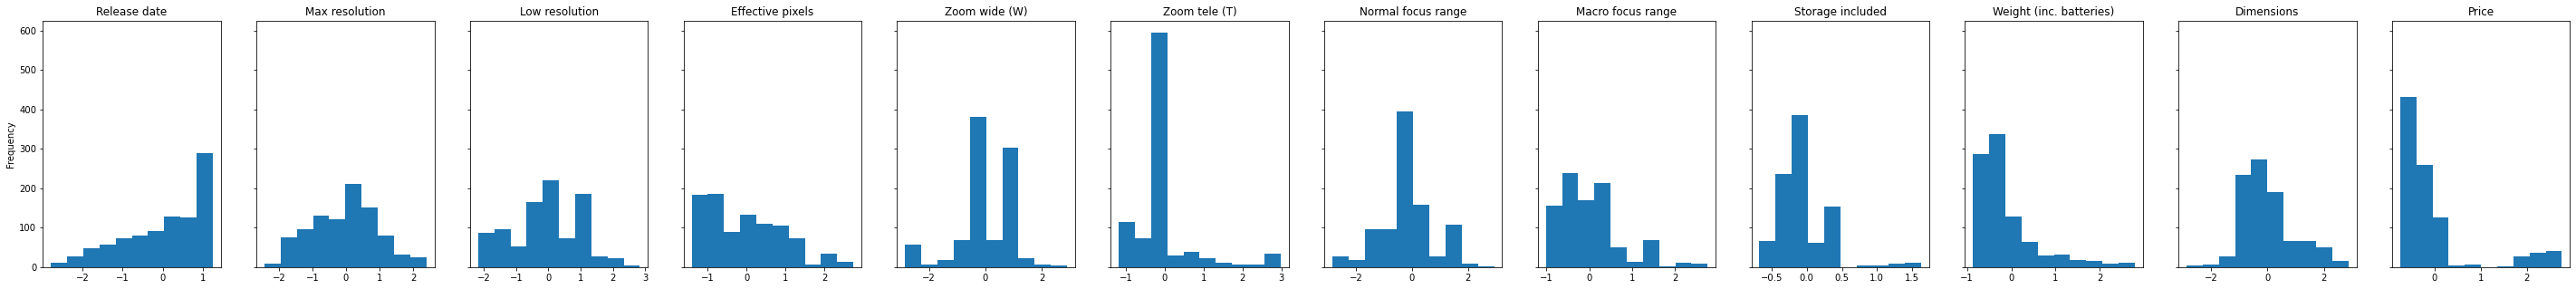

In [7]:
import matplotlib.pyplot as plt

i=0; fig, ax = plt.subplots(1, 12, sharex='col', sharey='row',figsize=(50,5))
for col in No_dummy_cols:
    Camera[col].plot(kind='hist',title=col , ax=ax[i])
    i = i + 1

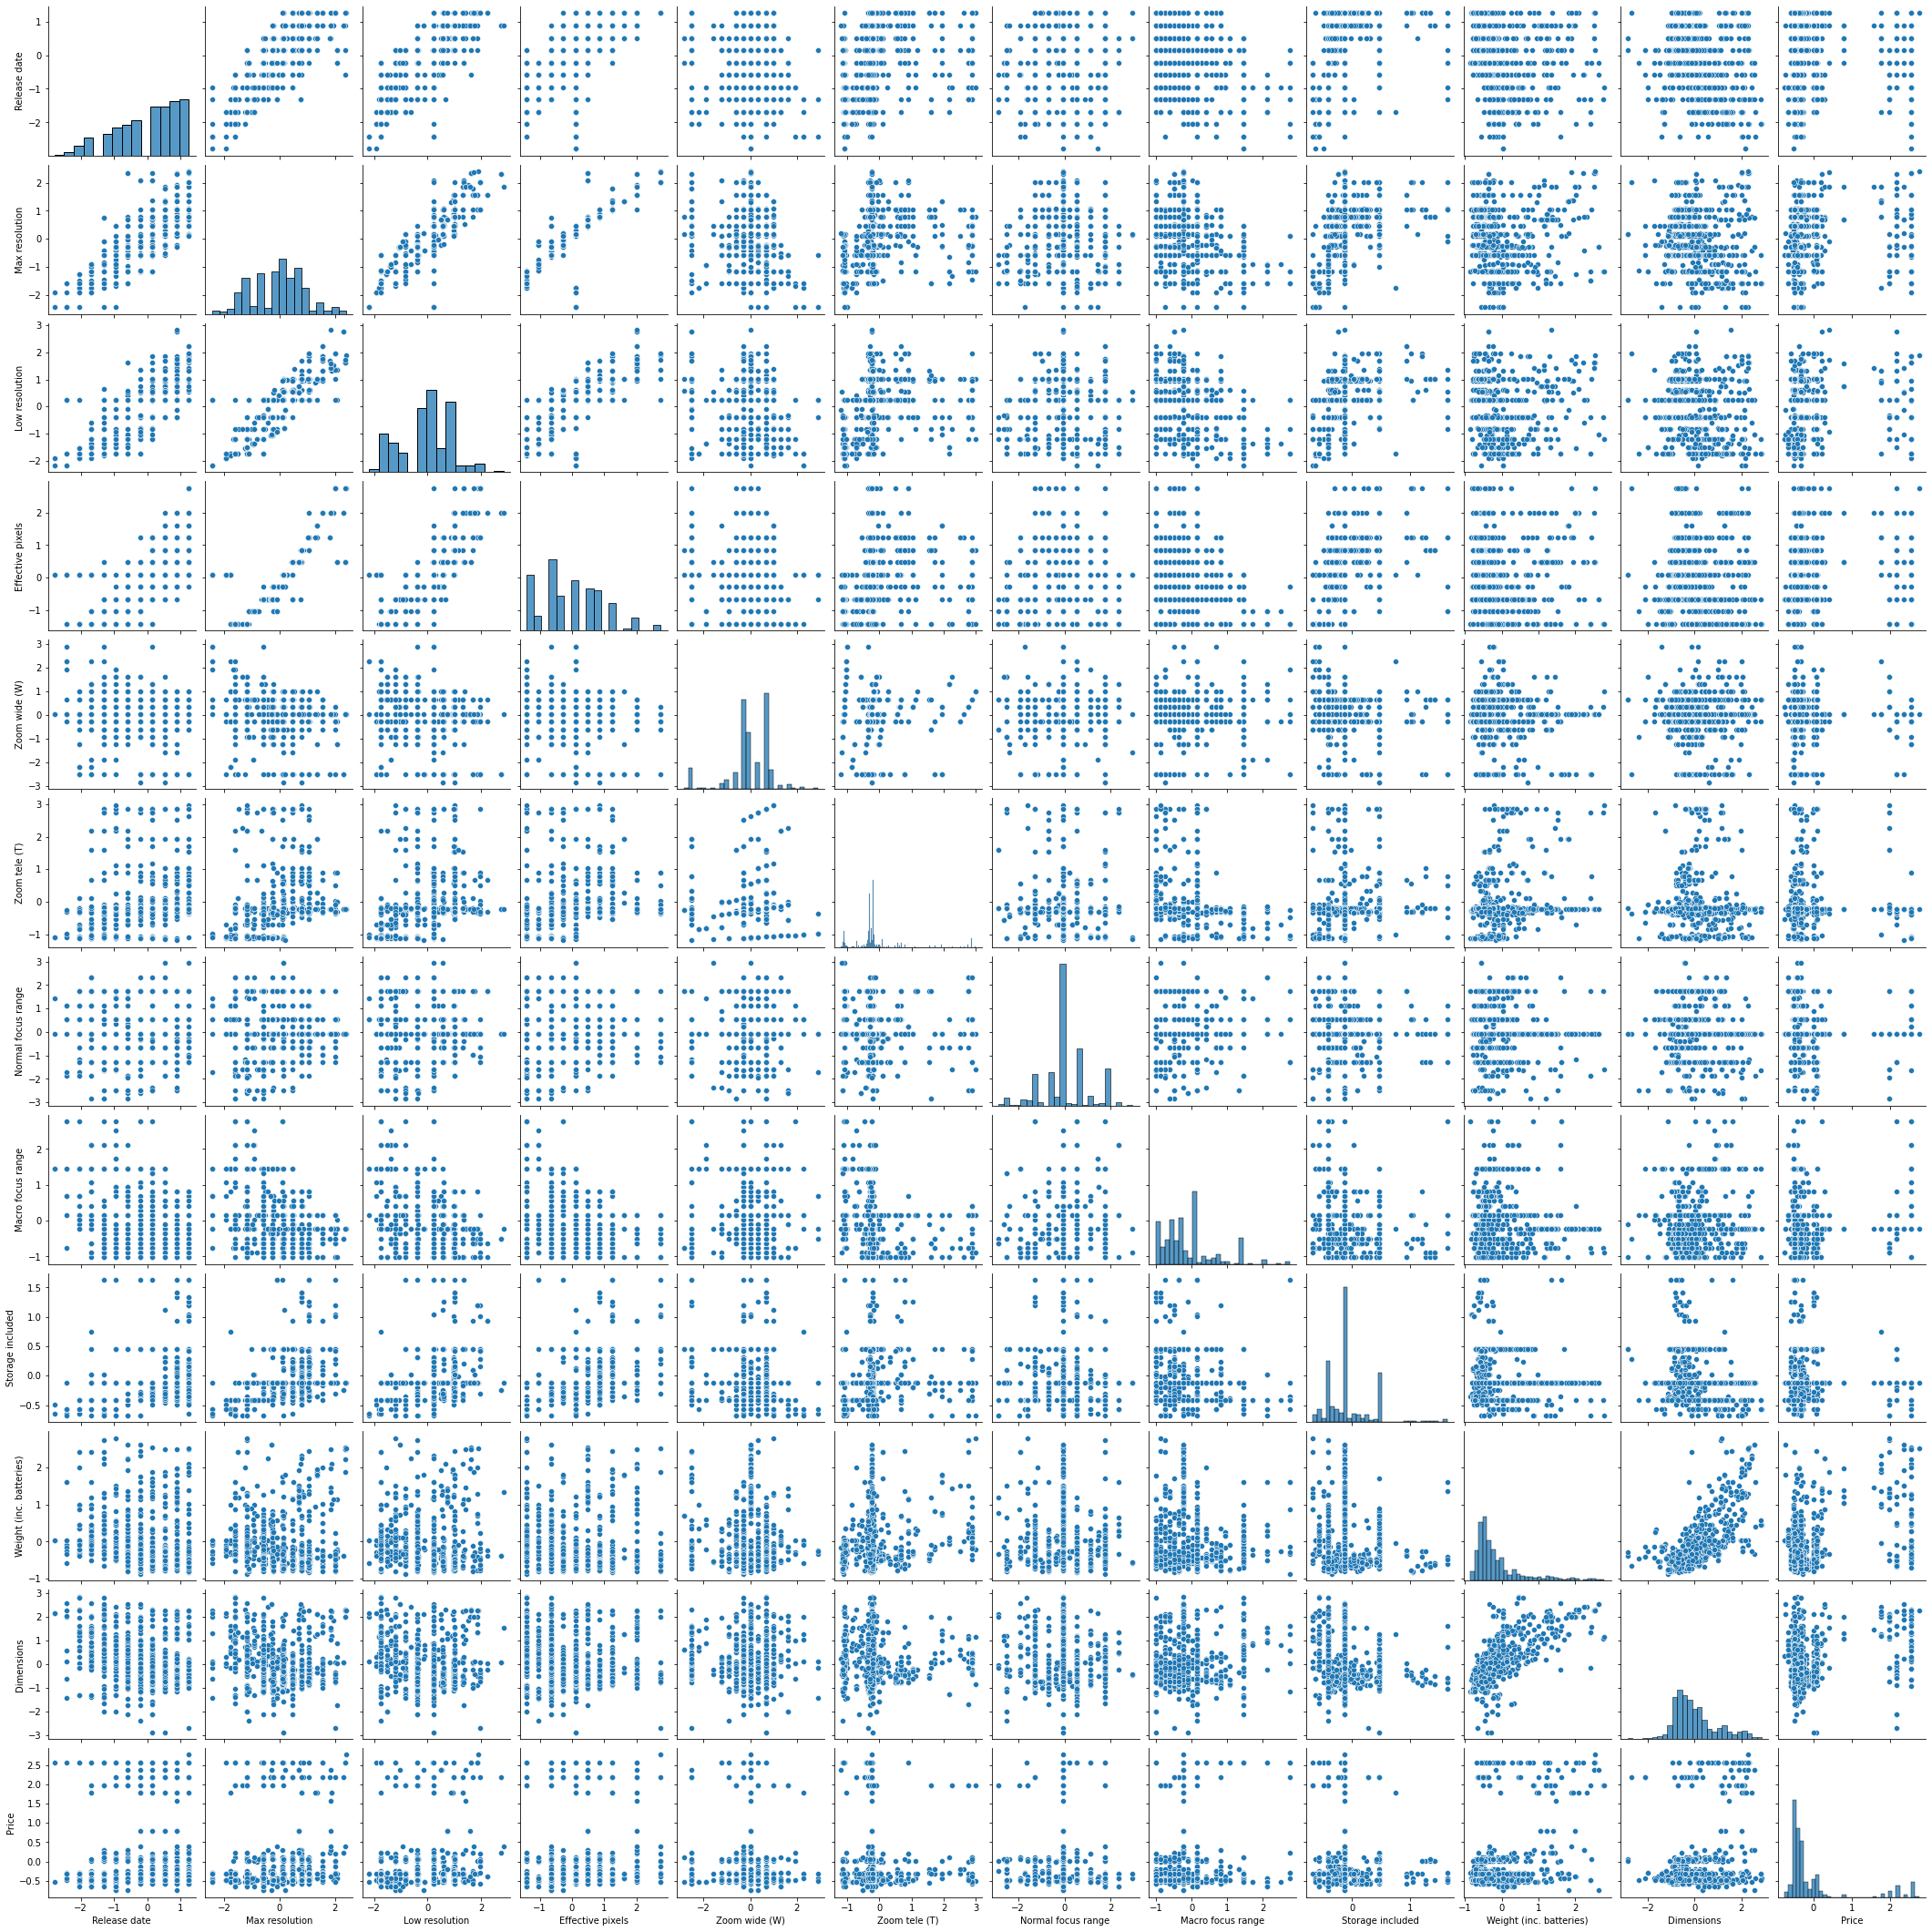

In [8]:
import seaborn as sns
# 1_d
sns.pairplot(Camera[No_dummy_cols])

<AxesSubplot:>

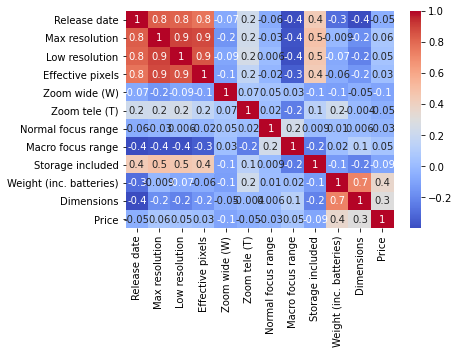

In [9]:
sns.heatmap(Camera[No_dummy_cols].corr(), annot = True, fmt='.1g',cmap= 'coolwarm')

In [10]:
# 1_e
x = Camera.drop(columns=['Price'])
y = Camera[['Price']]

In [11]:
from sklearn.model_selection import train_test_split
# 1_f
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [12]:
from sklearn.linear_model import LinearRegression
# 1_g
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [13]:
# 1_h
print('intercept = ', reg.intercept_)

intercept =  [-0.11426346]


In [14]:
print('coef = ', reg.coef_)

coef =  [[ 0.03835546  0.12225162  0.07991715 -0.09510279  0.072148   -0.22023072
  -0.03180925  0.07840773 -0.1634233   0.50897977  0.0682755   0.26117423
  -0.05361409 -0.06030488  0.37099139 -0.07052242 -0.18518896 -0.21885141
  -0.62582345 -0.31988654  0.93700384  0.12970012  0.00580881  0.62489612
   1.61447844 -0.05810955 -0.02438444 -0.14180303 -0.06091987 -1.96503787
   0.19800629 -0.35761274]]


In [15]:
x = [0,0,0,0,0,0,0,0,
     0,0,0,0,0,0,0,0,
     0,0,0,0,0,0,0,0,
     0,0,0,0,0,0,0,0]

test = pd.DataFrame(columns=x_test.columns)
test.loc[1] = x
display(test)

r = reg.predict(test)
print(r == reg.intercept_)

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),...,Nikon,Olympus,Panasonic,Pentax,Ricoh,Samsung,Sanyo,Sigma,Sony,Toshiba
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[[ True]]
